

Epoch: 50
--------------------------------------------------


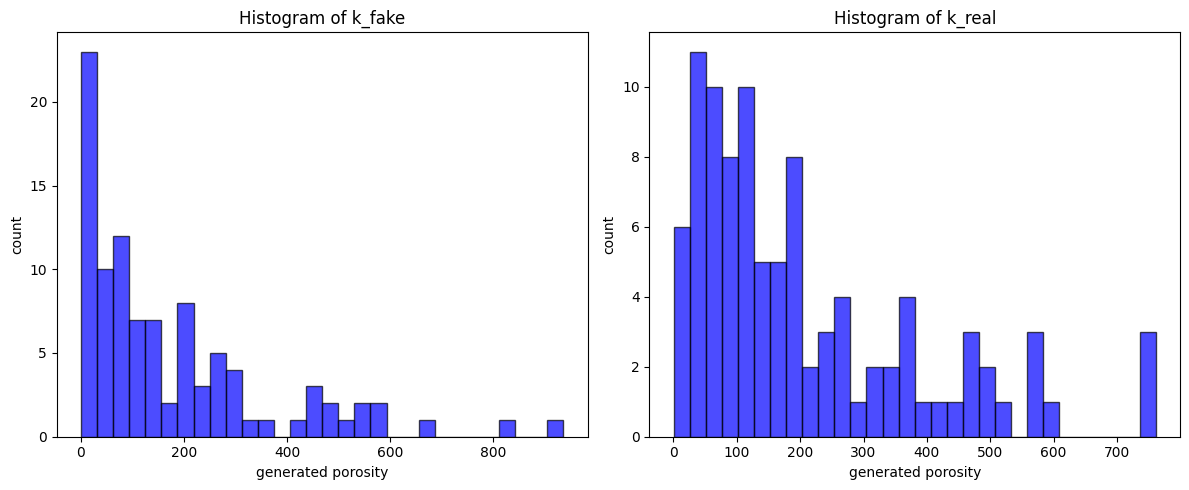



Epoch: 130
--------------------------------------------------


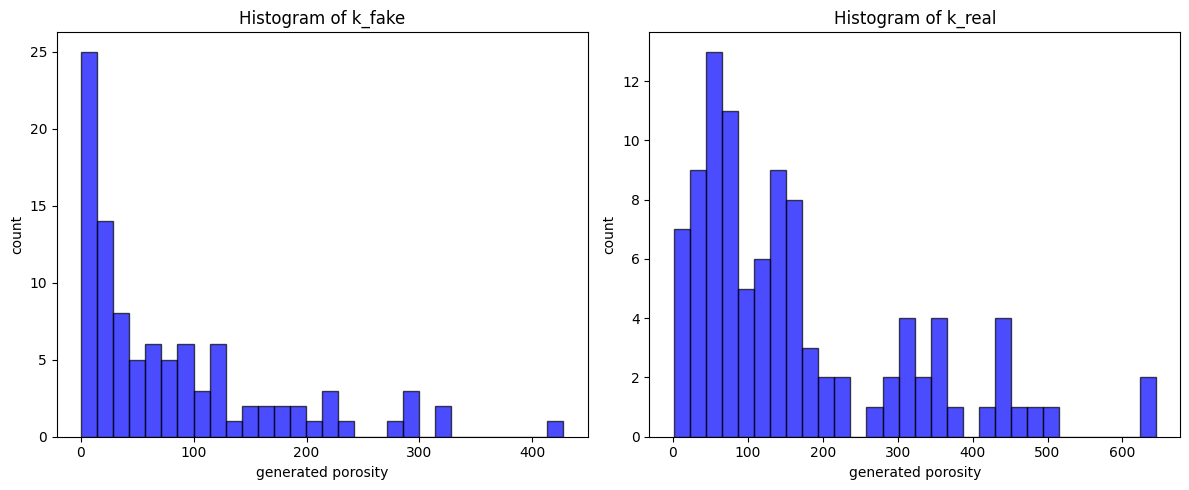



Epoch: 170
--------------------------------------------------


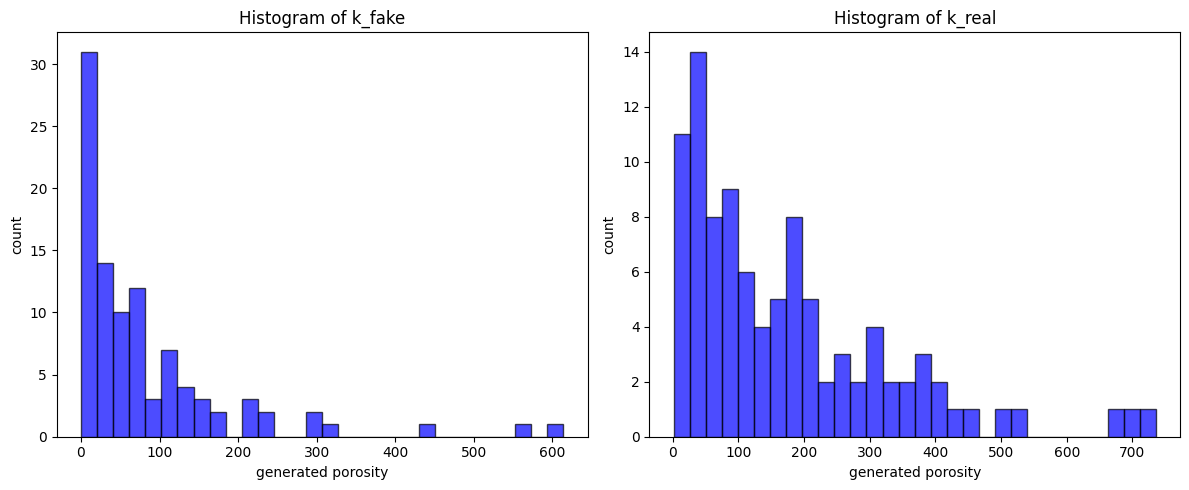



Epoch: 210
--------------------------------------------------


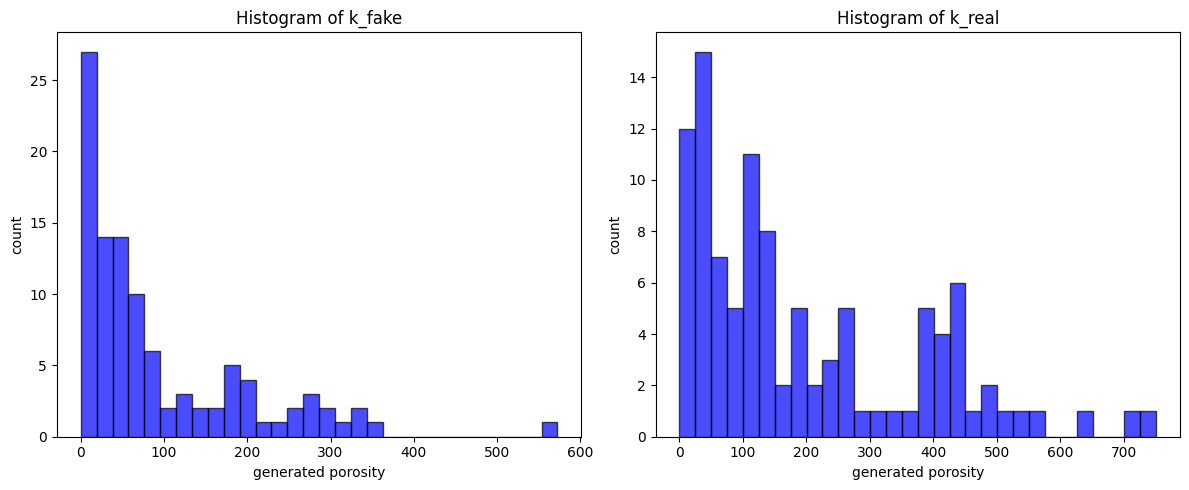



Epoch: 280
--------------------------------------------------


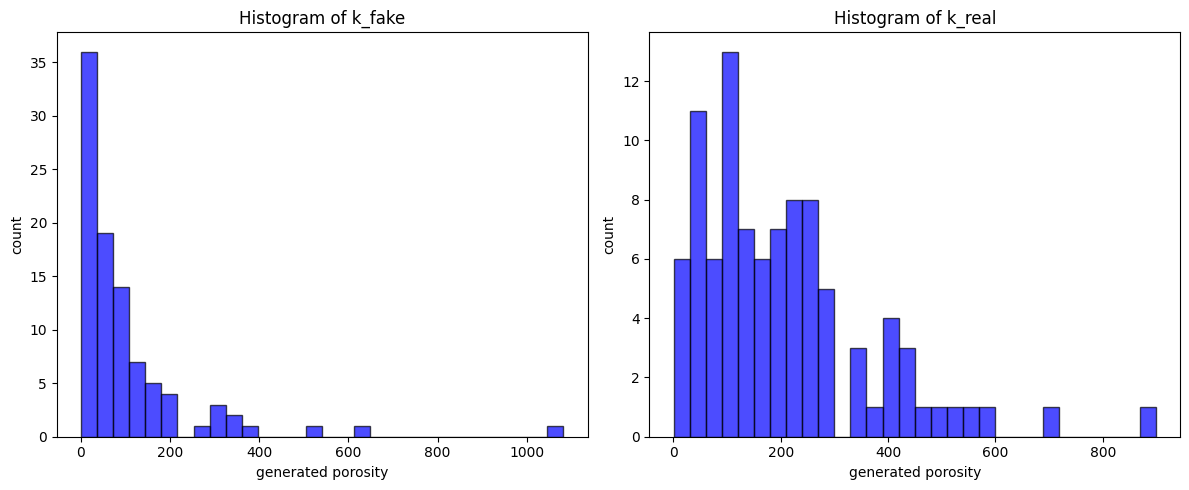

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_data(epoch_transformer, vol_dim=3):
    file_path = f'ex11/epoch_{epoch_transformer}/phys_result_{vol_dim}.pkl'
    with open(file_path, 'rb') as file:
        phys_result = pickle.load(file)

    return phys_result

def load_data_128(epoch_transformer, vol_dim=3):
    file_path = f'ex11/epoch_{epoch_transformer}/phys_result_{vol_dim}_128.pkl'
    with open(file_path, 'rb') as file:
        phys_result = pickle.load(file)

    return phys_result


for epoch in [50,130,170,210,280]:
    phys_result = load_data_128(epoch)
    phys_real = phys_result['real']
    phys_pred = phys_result['fake']

    # compare porosity
    phi_real = []
    phi_fake = []
    k_real = []
    k_fake = []

    euler_real = []
    euler_fake = []

    for ds_real, ds_fake in zip(phys_real, phys_pred):
        if ds_real and ds_fake:
            phi_real.append(ds_real['porosity'])
            phi_fake.append(ds_fake['porosity'])
            k_real.append(ds_real['kabs'][0])
            k_fake.append(ds_fake['kabs'][0])
            euler_real.append(ds_real['euler'])
            euler_fake.append(ds_fake['euler'])

    print('\n')
    print(f'Epoch: {epoch}')
    print(50*'-')
    # f = plt.figure()
    # plt.scatter(phi_real, phi_fake, s=5)
    # plt.xlabel('Real porosity')
    # plt.ylabel('Fake porosity')

    # f = plt.figure()
    # plt.scatter(k_real, k_fake, s=5)
    # plt.xlabel('Real kabs')
    # plt.ylabel('Fake kabs')

    f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot the first histogram
    ax[0].hist(k_fake, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
    ax[0].set_xlabel('generated porosity')
    ax[0].set_ylabel('count')
    ax[0].set_title('Histogram of k_fake')

    # Plot the second histogram
    ax[1].hist(k_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
    ax[1].set_xlabel('generated porosity')
    ax[1].set_ylabel('count')
    ax[1].set_title('Histogram of k_real')

    # Display the figure with the histograms
    plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
    plt.show()




# f = plt.figure()
# _ = plt.hist(k_gen,bins=20,edgecolor='black',facecolor='blue',alpha=0.7)
# plt.xlabel('generated kabs')
# plt.ylabel('count')

# f = plt.figure()
# _ = plt.hist(eul_gen,bins=20,edgecolor='black',facecolor='blue',alpha=0.7)
# plt.xlabel('generated euler')
# plt.ylabel('count')
    

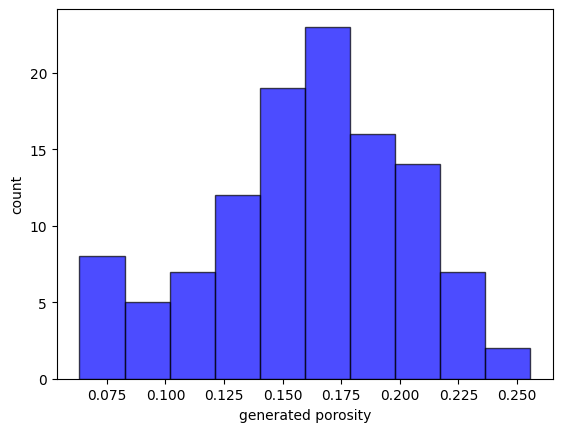

In [13]:
f = plt.figure()
_ = plt.hist(phi_fake, edgecolor='black', facecolor='blue', alpha=0.7)
plt.xlabel('generated porosity')
plt.ylabel('count')
plt.show()



Epoch: 50
--------------------------------------------------


Epoch: 130
--------------------------------------------------


Epoch: 170
--------------------------------------------------


Epoch: 210
--------------------------------------------------


Epoch: 280
--------------------------------------------------


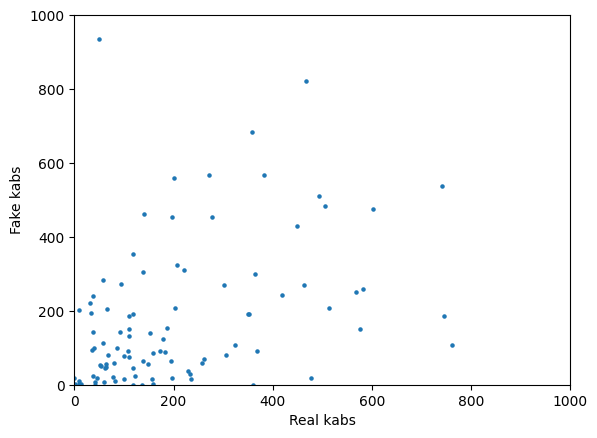

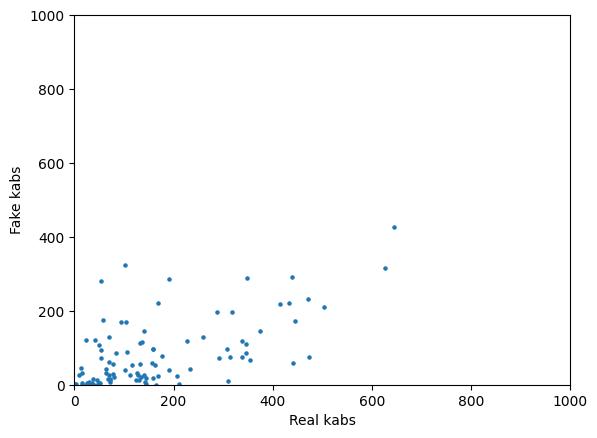

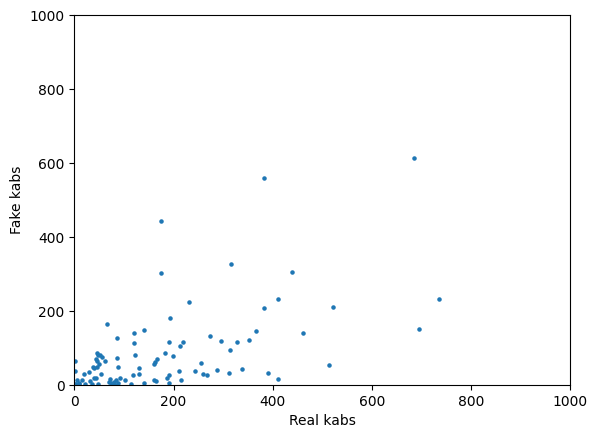

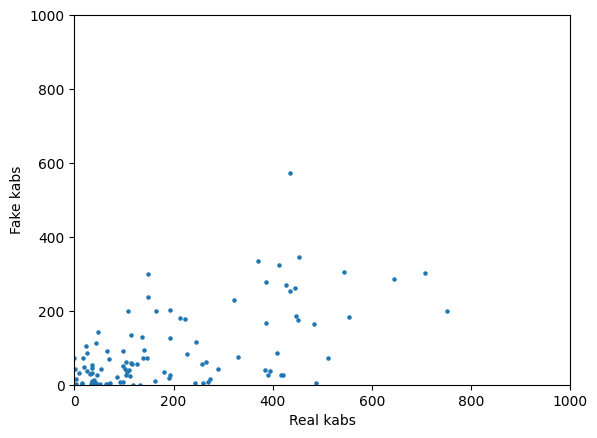

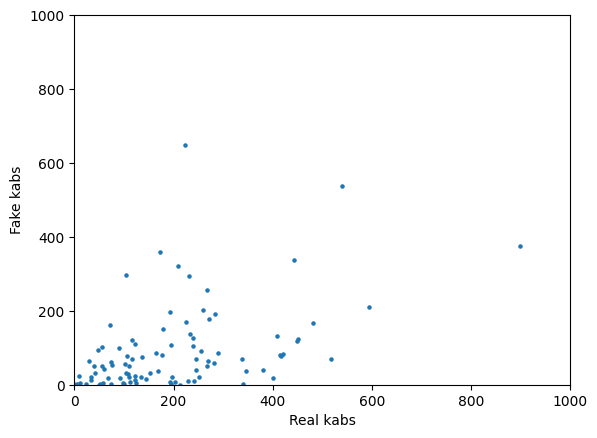

In [5]:
for epoch in [50,130,170,210,280]:
    phys_result = load_data_128(epoch)
    phys_real = phys_result['real']
    phys_pred = phys_result['fake']

    # compare porosity
    phi_real = []
    phi_fake = []

    k_real = []
    k_fake = []

    for ds_real, ds_fake in zip(phys_real, phys_pred):
        if ds_real and ds_fake:
            phi_real.append(ds_real['porosity'])
            phi_fake.append(ds_fake['porosity'])
            k_real.append(ds_real['kabs'])
            k_fake.append(ds_fake['kabs'])

    print('\n')
    print(f'Epoch: {epoch}')
    print(50*'-')
    # f = plt.figure()
    # plt.scatter(phi_real, phi_fake, s=5)
    # plt.xlim([0,0.5])
    # plt.ylim([0,0.5])
    # plt.xlabel('Real porosity')
    # plt.ylabel('Fake porosity')

    f = plt.figure()
    plt.scatter(k_real, k_fake, s=5)
    plt.xlabel('Real kabs')
    plt.ylabel('Fake kabs')
    plt.xlim([0,1000])
    plt.ylim([0,1000])